# RUN PERFORMANCE PROJECT - Pau Sampietro  

## *Predicting future races:* DEEP LEARNING APPROACH

For the moment, The weighted linear regression is our best model to do predictions for future runs. Now, we want to try how Neural Networks could help us doing predictions. As a linear regression could be represented as a NN with no hidden layers, we want to try with some easy NN models, in order to try to get better predictions, but mainly to understand how Neural Networks works, and also what are epochs and learning rate and how to tune them.

We will work with an Enviroment (tensorflowEnv) specially created for this purpose, and we will use **tensorflow and keras**
to create our model. We also added a plugin to Juypter Notebook in order to switch between Conda enviroments

<img src="images/NN structure.jpeg">

*Examples of Regression workflow (**left**) and Neural Network with more deep structure (**right**)*

In [4]:
import tensorflow as tf

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

import pandas as pd

import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

from matplotlib import pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

from rpdb import read_table, read_table_sql, export_table

Using TensorFlow backend.


#### Import table moves from Pau from the Database 

In [ ]:
moves = read_table('moves_feat')
moves.drop(columns='index', inplace=True)
moves.head()

### 1. Data preprocessing (Scaling input features & Train_Test Splitting)

In [53]:
X = moves[['distance', 'accum_ascent', 'ascent_ratio']]
y = moves['moving_time']

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train = preprocessing.scale(X_train)
X_test = preprocessing.scale(X_test)

### 2. First Approach to Neural Networks Hyperparameters

In this case, we will try some values in order to understand the impact of the parameters above:
* **Learning rate**: controls how much to change the model in response to the estimated error each time the model weights are updated
* **Epochs**: Training your network on each item of the set once is an epoch

<img src="images/LR vs epoch.png">

As we have **really few data**, we will try to fit our model to a **very simple NN**, and tune the parameters in order to see if we could obtain such good results

#### 2.1. Simple model: No hidden Layers. Testing Learning Rate [0.1, 1, 5, 10, 100]

In [4]:
LR = [0.1, 1, 5, 10, 100]

for i in LR:
    # linear regression (NO HIDDEN LAYERS) model: Shape input: accum_ascent and distance, output movin_time
    model = Sequential()
    model.add(Dense(1, input_shape=(3,)))
    
    # compiling model
    model.compile(Adam(lr=i), 'mean_squared_error')
    
    # fitting model
    history = model.fit(X_train, y_train, epochs = 100, validation_split = 0.1, verbose = 0)
    history_dict=history.history
    
    # plotting model's training cost/loss and model's validation split cost/loss
    loss_values = history_dict['loss']
    val_loss_values=history_dict['val_loss']
    plt.figure()
    plt.title(f'LR = {i}')
    plt.xlabel('epoch')
    plt.plot(loss_values,'bo',label='training loss')
    plt.plot(val_loss_values,'r',label='validation split loss')
    plt.legend()

NameError: name 'Sequential' is not defined

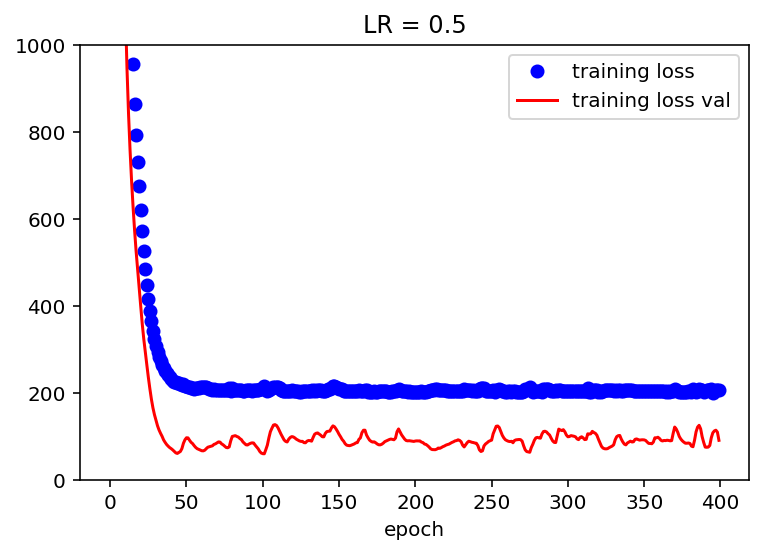

In [58]:
lr = 0.5
model = Sequential()
model.add(Dense(1, input_shape=(3,), activation = 'relu'))
model.compile(Adam(lr=lr), 'mean_squared_error')
history = model.fit(X_train, y_train, epochs = 400, validation_split = 0.1,verbose = 0)

history_dict=history.history
loss_values = history_dict['loss']
val_loss_values=history_dict['val_loss']
plt.plot(loss_values,'bo',label='training loss')
plt.plot(val_loss_values,'r',label='training loss val')
plt.title(f'LR = {lr}')
plt.xlabel('epoch')
plt.ylim((0,1000))
plt.legend()
plt.show()

In [59]:
# Runs model 
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculates and prints r2 score of training and testing data
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_test_pred)))

The R2 score on the Train set is:	0.923
The R2 score on the Test set is:	0.908


# good model

In [81]:
X = moves[['distance', 'ascent_ratio']]
y = moves['moving_time']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train = preprocessing.scale(X_train)
X_test = preprocessing.scale(X_test)

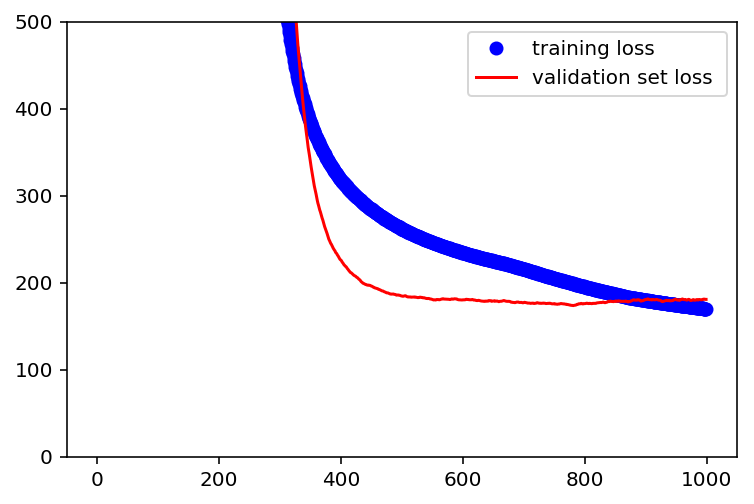

In [82]:

# Defines "deep" model and its structure
model = Sequential()
model.add(Dense(11, input_shape=(2,), activation='relu'))
model.add(Dense(11, activation='relu'))
model.add(Dense(11, activation='relu'))
model.add(Dense(11, activation='relu'))
model.add(Dense(1,))
model.compile(Adam(lr=0.0002), 'mean_squared_error')

# Runs model for 1000 iterations and assigns this to 'history'
history = model.fit(X_train, y_train, epochs = 1000, validation_split = 0.2, verbose = 0)

# Plots 'history'
history_dict=history.history
loss_values = history_dict['loss']
val_loss_values=history_dict['val_loss']
plt.plot(loss_values,'bo',label='training loss')
plt.plot(val_loss_values,'r',label='validation set loss ')
plt.ylim(0,500)
plt.legend()

In [83]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculates and prints r2 score of training and testing data
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_test_pred)))

The R2 score on the Train set is:	0.909
The R2 score on the Test set is:	0.583


Epoch 00474: early stopping


(0, 700)

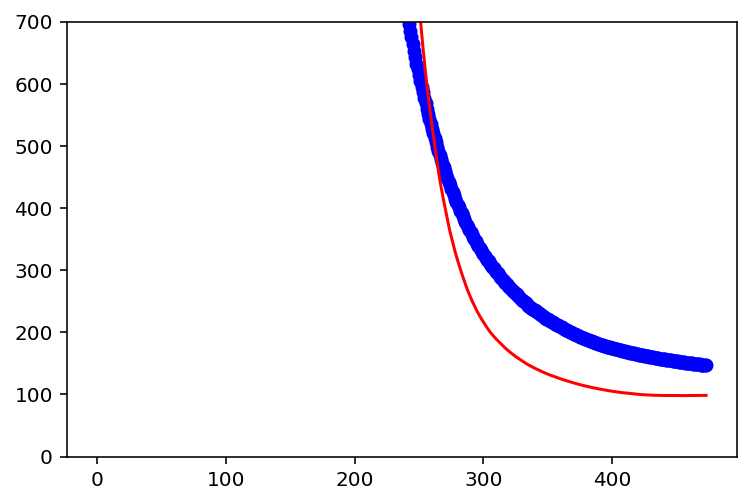

In [97]:
# Defines "deep" model and its structure
model = Sequential()
model.add(Dense(13, input_shape=(2,), activation='relu'))
model.add(Dense(13, activation='relu'))
model.add(Dense(13, activation='relu'))
model.add(Dense(13, activation='relu'))
model.add(Dense(1,))
model.compile(Adam(lr=0.0002), 'mean_squared_error')

# Pass several parameters to 'EarlyStopping' function and assigns it to 'earlystopper'
earlystopper = EarlyStopping(monitor='val_loss', min_delta=0, patience=15, verbose=1, mode='auto')

# Fits model over 1000 iterations with 'earlystopper' callback, and assigns it to history
history = model.fit(X_train, y_train, epochs = 500, validation_split = 0.2,shuffle = True, verbose = 0, 
                    callbacks = [earlystopper])

# Plots 'history'
history_dict=history.history
loss_values = history_dict['loss']
val_loss_values=history_dict['val_loss']
plt.plot(loss_values,'bo',label='training loss')
plt.plot(val_loss_values,'r',label='training loss val')
plt.ylim(0,700)

In [98]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculates and prints r2 score of training and testing data
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_test_pred)))

The R2 score on the Train set is:	0.927
The R2 score on the Test set is:	0.594


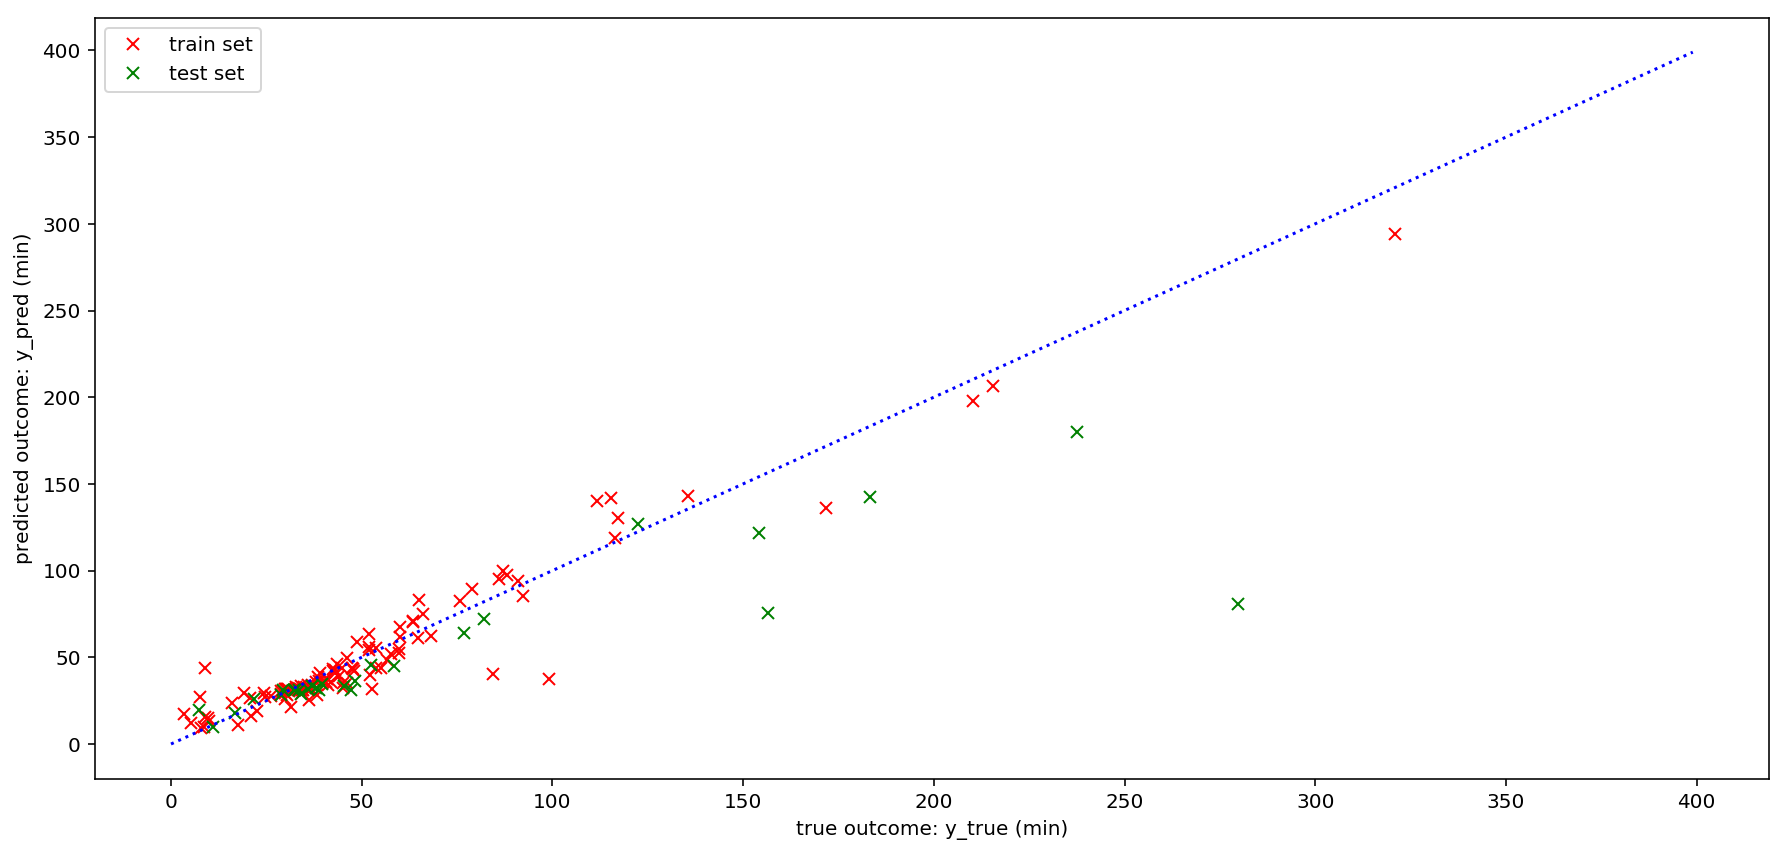

In [99]:
plt.figure (figsize=(15,7))
plt.plot(y_train, y_train_pred, 'xr', label='train set')
plt.plot(y_test, y_test_pred, 'xg', label = 'test set')
plt.plot([i for i in range(400)],[i for i in range(400)], ':b')
plt.xlabel('true outcome: y_true (min)')
plt.ylabel('predicted outcome: y_pred (min)')
plt.legend()

In [67]:
races = read_table('races')
races.head()

,index,name,distance,accum_ascent,days_from,lr_pred,kn_pred,lrW_pred
0,0,delta prat,10000.0,25.0,-13,36.639508,43.5,35.981029
1,1,catllaras,42300.0,2700.0,-27,452.950483,321.0,459.354518
2,2,stockholm,42195.0,172.0,-40,163.870622,321.0,160.165168
3,3,ulldeter,21000.0,1300.0,-62,219.990278,115.4,223.194372


In [68]:
races['ascent_ratio'] = races.apply(lambda x: round(x['accum_ascent']/(x['distance']/1000),1), axis = 1)

In [69]:
races

,index,name,distance,accum_ascent,days_from,lr_pred,kn_pred,lrW_pred,ascent_ratio
0,0,delta prat,10000.0,25.0,-13,36.639508,43.5,35.981029,2.5
1,1,catllaras,42300.0,2700.0,-27,452.950483,321.0,459.354518,63.8
2,2,stockholm,42195.0,172.0,-40,163.870622,321.0,160.165168,4.1
3,3,ulldeter,21000.0,1300.0,-62,219.990278,115.4,223.194372,61.9


In [100]:
X_races = preprocessing.scale(races[['distance','accum_ascent']])

In [101]:
races_nn_pred = model.predict(X_races)
print(f'* NN predictions for given races: {races_nn_pred}')

* NN predictions for given races: [[ 23.934484]
 [110.28208 ]
 [ 70.70378 ]
 [ 22.84685 ]]
